In [ ]:
FACIAL EMOTIONS RECOGNITION

In [2]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

In [ ]:
#APPROACH

#Load Dataset
#Display Expressions
#Image Processing 
#Model Building
#Fit Model With Train and Test Data
#Model Evaluation
#Plot Loss And Accuracy data
#Model Deployment

In [3]:
#Load dataset 
set = '/Users/akeweje1/Downloads/archive-2'
train= '/Users/akeweje1/Downloads/archive-2/Training/Training'
test= '/Users/akeweje1/Downloads/archive-2/Testing/Testing'

In [4]:
from tensorflow.keras.preprocessing.image import load_img
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

In [5]:
#Define emotions and load data

emotions = ['Angry', 'Fear', 'Happy','Neutral', 'Sad', 'Surprise']

train_data = []
for emotion in emotions:
    for file in os.listdir(train + '/' + emotion):
        img = cv2.imread(train + '/' + emotion + '/' + file)
        img = cv2.resize(img, (48, 48))
        train_data.append([img, emotions.index(emotion)])

test_data = []
for emotion in emotions:
    for file in os.listdir(test + '/' + emotion):
        img = cv2.imread(test + '/' + emotion + '/' + file)
        img = cv2.resize(img, (48, 48))
        test_data.append([img, emotions.index(emotion)])

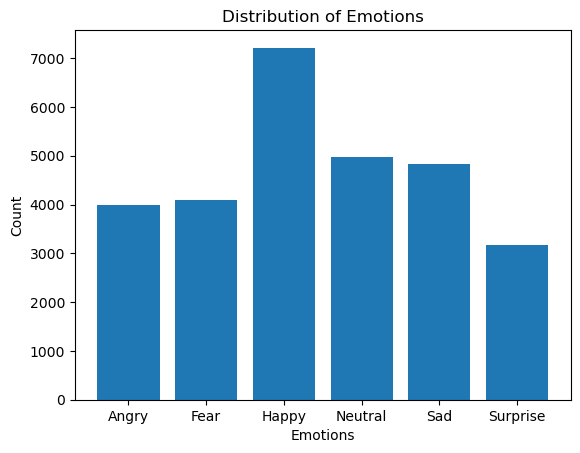

In [6]:
#Emotions Distribution

emotion_counts = [len(os.listdir(train + '/' + emotion)) for emotion in emotions]
plt.bar(emotions, emotion_counts)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.show()


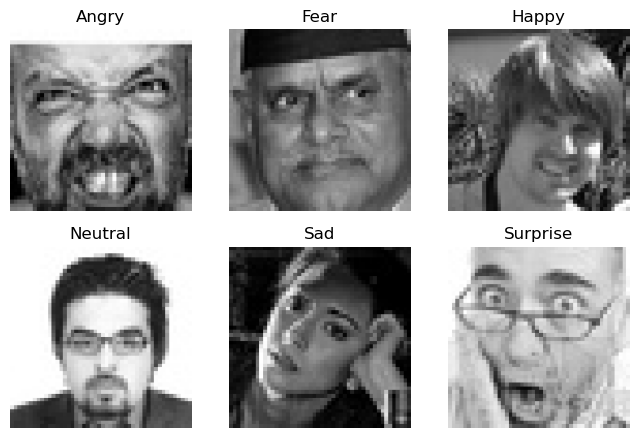

In [7]:
#Image Processing 

img_size = 224

plt.figure(figsize=(8, 8))
for i, emotion in enumerate(emotions):
    plt.subplot(3, 3, i+1)
    img_path = os.path.join(set, 'Training', 'Training', emotion, os.listdir(os.path.join(set, 'Training', 'Training', emotion))[0])
    img = load_img(img_path, target_size=(img_size, img_size))
    plt.imshow(img)
    plt.axis('off')
    plt.title(emotion)
plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
#Image Generator 

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(64, 64),  
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(64, 64),  
    batch_size=32,
    class_mode='categorical')


Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


In [10]:
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model
from keras.optimizers import SGD, RMSprop


In [59]:
#Model Building

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,134 (1.34 MB)

 Trainable params: 352,134 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [57]:
#Fit Model With Train and Test Data
mcp = ModelCheckpoint('./model.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es= EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1,
                              restore_best_weights=True)
rlr= ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.2,
                                       patience=3,
                                       verbose=1,
                                       min_delta=0.0001)
list=(es,mcp,rlr)

                             

In [61]:
#Model Fitting 

history = model.fit(
    train_generator,
    epochs=50,  # Run all 10 epochs
    validation_data=test_generator,
    verbose=2
)

Epoch 1/50
884/884 - 87s - 99ms/step - accuracy: 0.3410 - loss: 1.6097 - val_accuracy: 0.4415 - val_loss: 1.4170
Epoch 2/50
884/884 - 91s - 103ms/step - accuracy: 0.4544 - loss: 1.3849 - val_accuracy: 0.4868 - val_loss: 1.3145
Epoch 3/50
884/884 - 90s - 101ms/step - accuracy: 0.4992 - loss: 1.2868 - val_accuracy: 0.5237 - val_loss: 1.2331
Epoch 4/50
884/884 - 90s - 102ms/step - accuracy: 0.5195 - loss: 1.2314 - val_accuracy: 0.5438 - val_loss: 1.1876
Epoch 5/50
884/884 - 92s - 104ms/step - accuracy: 0.5377 - loss: 1.1924 - val_accuracy: 0.5476 - val_loss: 1.1715
Epoch 6/50
884/884 - 92s - 104ms/step - accuracy: 0.5493 - loss: 1.1585 - val_accuracy: 0.5553 - val_loss: 1.1491
Epoch 7/50
884/884 - 93s - 105ms/step - accuracy: 0.5634 - loss: 1.1369 - val_accuracy: 0.5524 - val_loss: 1.1599
Epoch 8/50
884/884 - 93s - 105ms/step - accuracy: 0.5724 - loss: 1.1129 - val_accuracy: 0.5575 - val_loss: 1.1489
Epoch 9/50
884/884 - 94s - 106ms/step - accuracy: 0.5811 - loss: 1.0909 - val_accuracy: 0

In [24]:
#Find The Best Epoch
best_epoch = np.argmax(history.history['accuracy']) + 1
print('Best epoch', best_epoch)

Best epoch 50


In [25]:
#Model Evaluation

test_loss, test_acc = model.evaluate(train_generator)
print(f'Loss: {test_loss}, Accuracy: {test_acc}')


884/884 ━━━━━━━━━━━━━━━━━━━━ 67s 76ms/step - accuracy: 0.7352 - loss: 0.7146
Loss: 0.7148318886756897, Accuracy: 0.7327485680580139


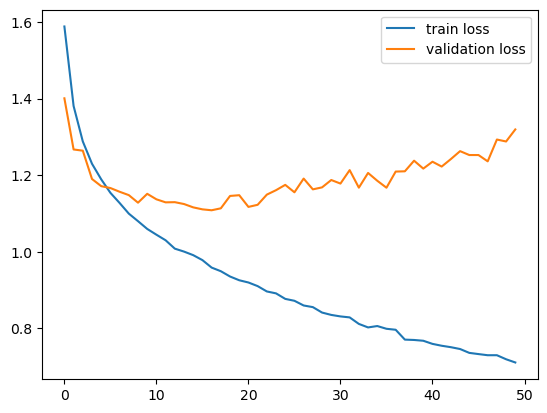

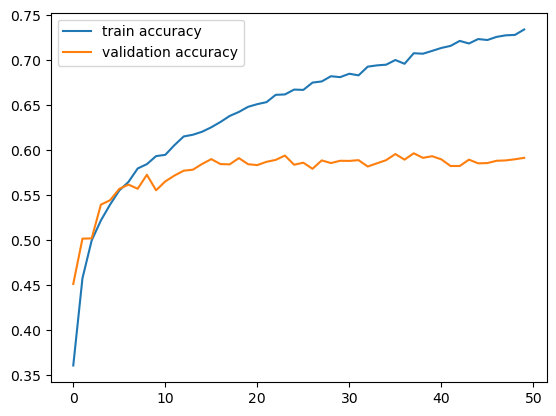

In [26]:
#Plot Loss And Accuracy data

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [66]:
model.save('my_model.keras')


In [114]:
face_classifier=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = load_model('my_model.keras')
emotions = ['Angry', 'Fear', 'Happy','Neutral', 'Sad', 'Surprise']


In [158]:
cap = cv2.VideoCapture(0)


In [37]:
pip install opencv-contrib-python


Note: you may need to restart the kernel to use updated packages.


In [159]:
cv2.face

<module 'cv2.face' (<_frozen_importlib_external.NamespaceLoader object at 0x10a3e8c90>)>

In [160]:
cv2.CascadeClassifier

cv2.CascadeClassifier

In [161]:

while True:
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face_region = frame[y:y+h, x:x+w]

        face_region = cv2.resize(face_region, (64, 64))

        face_region = face_region / 255.0

        face_region = np.expand_dims(face_region, axis=0)

        predictions = model.predict(face_region)

        emotion = emotions[np.argmax(predictions)]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    cv2.imshow('Face Reading', frame)

    # Exit on press of 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

error: OpenCV(4.10.0) /private/var/folders/g2/jmb84v212td90wcb900r5hq80000gn/T/pip-install-5_4uzlvb/opencv-python_92aafafc615b43129a94ead7ad6ea33c/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
